In [1]:
import os, shutil

In [2]:
original_base_dir ="/Users/pushkarsinghbhauryal/downloads/pythontest/train"
base_dir= "/Users/pushkarsinghbhauryal/downloads/pythontest/cat_and_dog"
if not os.path.exists(base_dir):
    os.makedirs(directory)

In [3]:
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)


In [5]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500)]
for fname in fnames:
    src = os.path.join(original_base_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
fnames = ['cat.{}.jpg'.format(i) for i in range(3000,4000)]
for fname in fnames:
    src = os.path.join(original_base_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500)]
for fname in fnames:
    src = os.path.join(original_base_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
fnames = ['dog.{}.jpg'.format(i) for i in range(3000,4000)]
for fname in fnames:
    src = os.path.join(original_base_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
fnames = ['dog.{}.jpg'.format(i) for i in range(4000,4015)]
for fname in fnames:
    src = os.path.join(original_base_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
from keras import models
from keras import layers


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [41]:
model= models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [43]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [44]:
from keras.preprocessing.image import ImageDataGenerator

In [45]:
train_datagen= ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [46]:
train_generator= train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=30,class_mode='binary')


Found 3000 images belonging to 2 classes.


In [47]:
validation_generator=train_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [48]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (30, 150, 150, 3)
labels batch shape: (30,)


In [49]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/25
100/100 [==============================] - 100s 1s/step - loss: 0.6922 - acc: 0.5237 - val_loss: 0.6745 - val_acc: 0.5575
Epoch 2/25
100/100 [==============================] - 99s 988ms/step - loss: 0.6567 - acc: 0.6120 - val_loss: 0.6280 - val_acc: 0.6605
Epoch 3/25
100/100 [==============================] - 102s 1s/step - loss: 0.6034 - acc: 0.6767 - val_loss: 0.5850 - val_acc: 0.7005
Epoch 4/25
100/100 [==============================] - 101s 1s/step - loss: 0.5563 - acc: 0.7080 - val_loss: 0.5514 - val_acc: 0.7215
Epoch 5/25
100/100 [==============================] - 102s 1s/step - loss: 0.5212 - acc: 0.7397 - val_loss: 0.5416 - val_acc: 0.7280
Epoch 6/25
100/100 [==============================] - 104s 1s/step - loss: 0.4903 - acc: 0.7647 - val_loss: 0.5335 - val_acc: 0.7330
Epoch 7/25
100/100 [==============================] - 102s 1s/step - loss: 0.4558 - acc: 0.7850 - val_loss: 0.5036 - val_acc: 0.7535
Epoch 8/25
100/100 [==============================] - 107s 1s/step 

In [50]:
model.save('cats_and_dogs_small_1.h5')

In [51]:
#model.save('cats_and_dogs_small_1.h5')
import matplotlib.pyplot as plt
%matplotlib inline
acc= history.history['acc']
val_acc= history.history['val_acc']
loss= history.history['loss']
val_loss=history.history['val_loss']
epoch= range(1,len(acc)+1)

Text(0,0.5,'Accuracy')

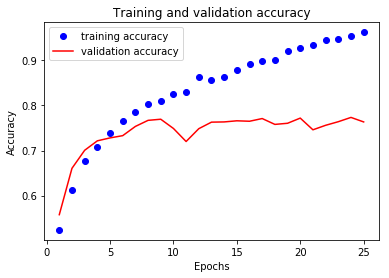

In [52]:
plt.plot(epoch,acc,'bo',label='training accuracy')
plt.plot(epoch,val_acc,'r',label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0,0.5,'Accuracy')

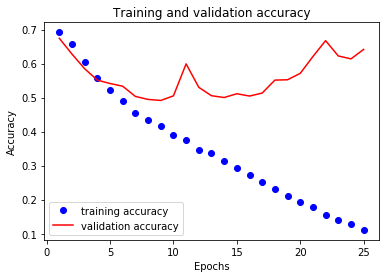

In [53]:
plt.figure()
plt.plot(epoch,loss,'bo',label='training accuracy')
plt.plot(epoch,val_loss,'r',label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')